https://zindi.africa/hackathons/zindi-mentorship-1-financial-inclusion-in-africa.

**Bank Account Prediction Analysis**

*Problem Statement*

Determine whether a study population from four African countries namely **Kenya, Uganda, Tanzania and Rwanda** owns a Bank account

In [1]:
import sys
print(sys.version)

3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]


In [93]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from scipy.stats import norm
from xgboost.sklearn import XGBClassifier
import xgboost as xgb

In [80]:
df = pd.read_csv('Train_v2.csv')
test = pd.read_csv('Test_v2.csv')

In [6]:
df.sample(5).transpose()

,2830,6691,19979,12090,17807
country,Kenya,Rwanda,Tanzania,Rwanda,Tanzania
year,2018,2016,2017,2016,2017
uniqueid,uniqueid_2831,uniqueid_624,uniqueid_5177,uniqueid_6023,uniqueid_3005
bank_account,No,Yes,No,No,No
location_type,Rural,Rural,Urban,Rural,Urban
cellphone_access,Yes,Yes,No,Yes,Yes
household_size,3,5,2,5,1
age_of_respondent,53,36,50,53,25
gender_of_respondent,Female,Male,Female,Male,Male
relationship_with_head,Head of Household,Head of Household,Head of Household,Head of Household,Head of Household


In [7]:
df.shape, test.shape

((23524, 13), (10086, 12))

In [21]:
df.isna().sum()
test.isna().sum()

country                   0
year                      0
uniqueid                  0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [8]:
df.dtypes, test.dtypes

(country                   object
 year                       int64
 uniqueid                  object
 bank_account              object
 location_type             object
 cellphone_access          object
 household_size             int64
 age_of_respondent          int64
 gender_of_respondent      object
 relationship_with_head    object
 marital_status            object
 education_level           object
 job_type                  object
 dtype: object, country                   object
 year                       int64
 uniqueid                  object
 location_type             object
 cellphone_access          object
 household_size             int64
 age_of_respondent          int64
 gender_of_respondent      object
 relationship_with_head    object
 marital_status            object
 education_level           object
 job_type                  object
 dtype: object)

In [14]:
df.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [13]:
df.describe(include=['object']).transpose()

,count,unique,top,freq
country,23524,4,Rwanda,8735
uniqueid,23524,8735,uniqueid_818,4
bank_account,23524,2,No,20212
location_type,23524,2,Rural,14343
cellphone_access,23524,2,Yes,17454
gender_of_respondent,23524,2,Female,13877
relationship_with_head,23524,6,Head of Household,12831
marital_status,23524,5,Married/Living together,10749
education_level,23524,6,Primary education,12791
job_type,23524,10,Self employed,6437


In [18]:
df.duplicated().sum()
test.duplicated().sum()

0

# **Checking for Outliers**

In [25]:
#for i in df.columns:
#    

**findings:**
    All unique values of each columns are expected values. No trace of an outlier. 

In [30]:
df['household_size'].min(),df['household_size'].max()

(1, 21)

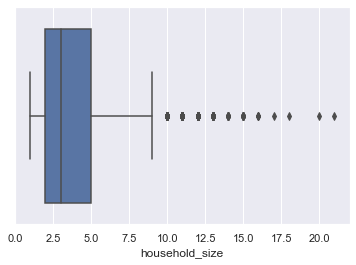

In [26]:
sns.boxplot(df['household_size'])

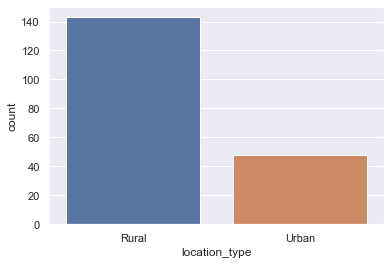

In [64]:
dfhouse=df[df.household_size > 10]
sns.countplot(dfhouse['location_type'])

**findings:**
    The boxplot shows highest household size ranges from 2 to 5. Most of the large household sizes happen to be in the rural locations. The household size distribution is completely normal.

In [ ]:
df['age_of_respondent'].min(),df['age_of_respondent'].max()

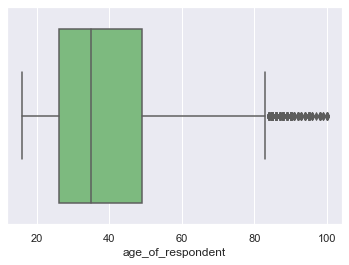

In [49]:
sns.boxplot(df['age_of_respondent'],palette='Greens')

**findings:**
    The above plot indicates that above age 81 could be an outlier but people do grow old hence it would not be considered as such. Majority of respondents lie between the age 20 to 60. Hence the youth population is higher then the elderly.

**selecting rows with age_of_repondent = 100 to check for outliers**

In [58]:
dfage=df[df.age_of_respondent > 90]
dfage.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
209,Kenya,2018,uniqueid_210,No,Rural,No,3,95,Female,Parent,Widowed,No formal education,Informally employed
340,Kenya,2018,uniqueid_341,No,Rural,No,2,95,Male,Head of Household,Married/Living together,Primary education,Farming and Fishing
370,Kenya,2018,uniqueid_371,No,Rural,Yes,3,95,Male,Head of Household,Married/Living together,Primary education,Other Income
483,Kenya,2018,uniqueid_484,No,Rural,No,1,93,Female,Head of Household,Widowed,No formal education,Government Dependent
823,Kenya,2018,uniqueid_824,No,Rural,Yes,4,95,Male,Head of Household,Married/Living together,Primary education,Remittance Dependent


**findings:** 
    
    Respondents in this age range have widows as majority and the few are still married and single.
    Only a few are still self employed, and the rests are both government and remittance dependent.
    Majority are still household heads.

# **Exploratory Data Analysis(EDA)**

**Bank_account status of respondents with respect to location_type**

In [17]:
pd.crosstab(df.bank_account,df.location_type, margins=True)

location_type,Rural,Urban,All
bank_account,,,
No,12672,7540,20212
Yes,1671,1641,3312
All,14343,9181,23524


**Bank_account status of respondents with respect to eduaction_level**

In [70]:
pd.crosstab(df.bank_account,df.education_level, margins=True)

education_level,No formal education,Other/Dont know/RTA,Primary education,Secondary education,Tertiary education,Vocational/Specialised training,All
bank_account,,,,,,,
No,4339,24,11698,3240,566,345,20212
Yes,176,11,1093,983,591,458,3312
All,4515,35,12791,4223,1157,803,23524


**Bank_account status of respondents with respect to job_type**

In [71]:
pd.crosstab(df.bank_account,df.job_type, margins=True)

job_type,Dont Know/Refuse to answer,Farming and Fishing,Formally employed Government,Formally employed Private,Government Dependent,Informally employed,No Income,Other Income,Remittance Dependent,Self employed,All
bank_account,,,,,,,,,,,
No,112,4806,87,484,197,5152,614,884,2287,5589,20212
Yes,14,635,300,571,50,445,13,196,240,848,3312
All,126,5441,387,1055,247,5597,627,1080,2527,6437,23524


**Bank_account status of respondents with respect to gender**

In [72]:
pd.crosstab(df.bank_account,df.gender_of_respondent, margins=True)

gender_of_respondent,Female,Male,All
bank_account,,,
No,12395,7817,20212
Yes,1482,1830,3312
All,13877,9647,23524


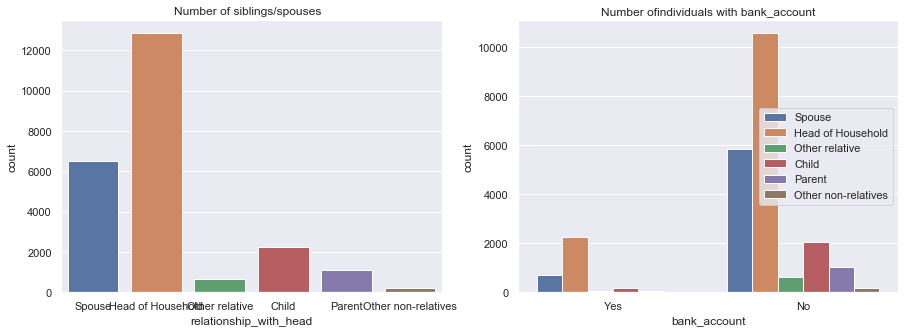

In [10]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(df['relationship_with_head'])
plt.title('Number of siblings/spouses  ');

plt.subplot(1,2,2)
sns.countplot(x="bank_account", hue="relationship_with_head", data=df)
plt.legend(loc='right')
plt.title('Number ofindividuals with bank_account');

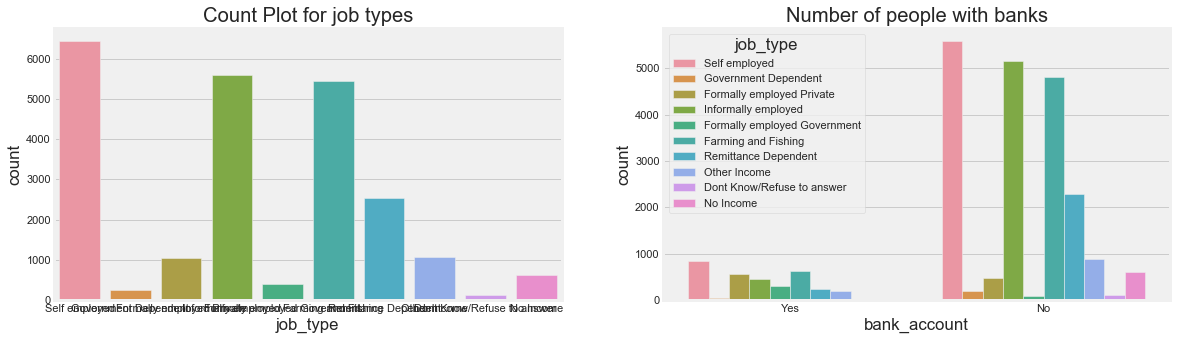

In [15]:
plt.figure(figsize=(20,5))
plt.style.use('fivethirtyeight')

plt.subplot(1,2,1)
sns.countplot(df['job_type'])
plt.title('Count Plot for job types');

plt.subplot(1,2,2)
sns.countplot(x="bank_account", hue="job_type", data=df)
plt.title('Number of people with banks');

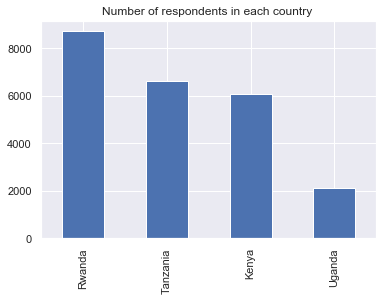

In [69]:
df['country'].value_counts().plot(kind='bar')
plt.title('Number of respondents in each country ');

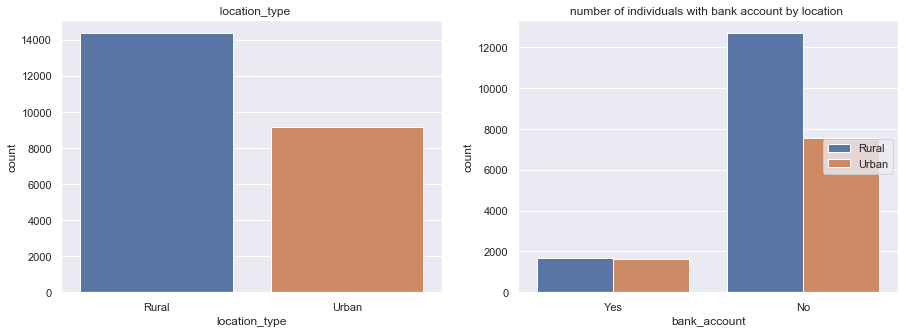

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(df['location_type'])
plt.title('  location_type');

plt.subplot(1,2,2)
sns.countplot(x="bank_account", hue="location_type", data=df)
plt.legend(loc='right')
plt.title('number of individuals with bank account by location ');

Text(0.5, 1.0, 'A violinplot of household_size against year')

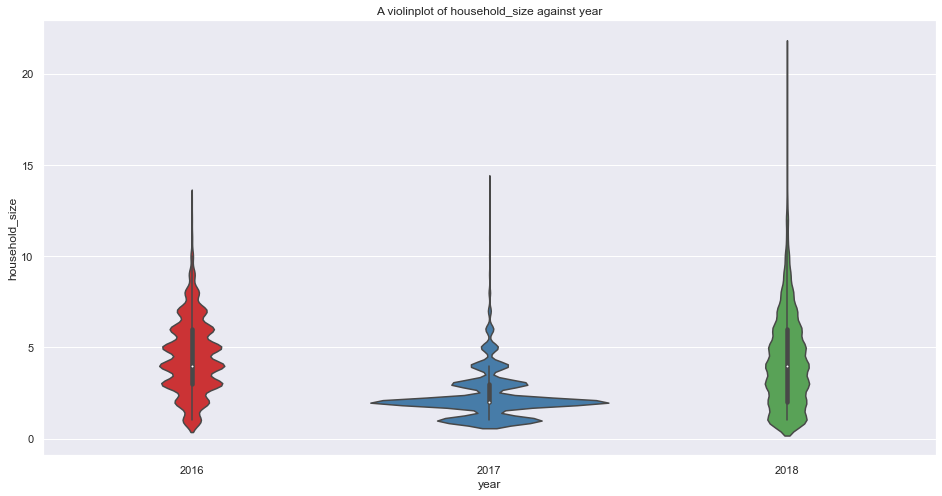

In [106]:
fig=plt.figure(figsize=(16, 8)) 
sns.violinplot(x="year", y="household_size", data=df , palette="Set1" ) 
plt.title('A violinplot of household_size against year')

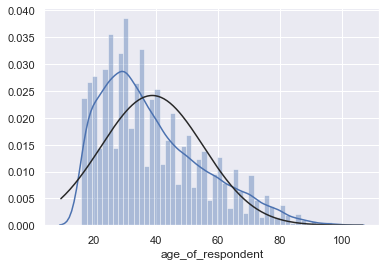

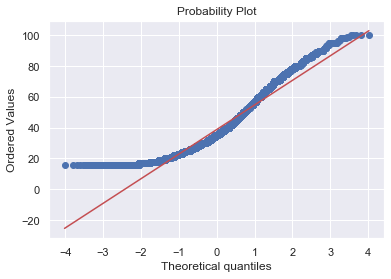

In [101]:

#histogram and normal probability plot
sns.distplot(df['age_of_respondent'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['age_of_respondent'], plot=plt)

This shows same id was used in the four countries but unique in each country.

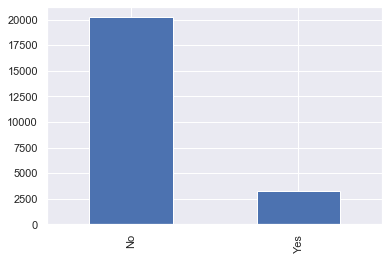

In [703]:
#visualising the number with bank accounts and without
df['bank_account'].value_counts().plot(kind='bar')

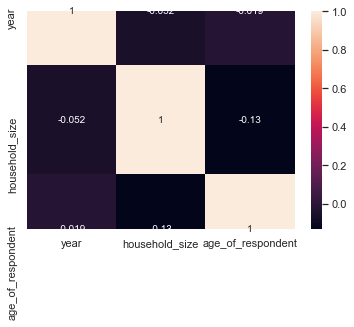

In [14]:
#visualizing corelation between columns
sns.heatmap(df.corr(), annot=True)

# Feature Engineering

**Label encoding**

In [81]:
#label encoding with categorical columns
df['location_type'] = label.fit_transform(df['location_type'])
df['cellphone_access'] = label.fit_transform(df['cellphone_access'])
df['gender_of_respondent'] = label.fit_transform(df['gender_of_respondent'])

test['location_type'] = label.fit_transform(test['location_type'])
test['cellphone_access'] = label.fit_transform(test['cellphone_access'])
test['gender_of_respondent'] = label.fit_transform(test['gender_of_respondent'])
test['marital_status'] = label.fit_transform(test['marital_status'])

In [82]:
#mapping Yes and No values of bank account with 0 and 1 
df['bank_account'] = df['bank_account'].map({'No':0,'Yes':1})

In [83]:
df.head(3)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,1,0,1,3,24,0,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0,0,0,5,70,0,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1,1,1,5,26,1,Other relative,Single/Never Married,Vocational/Specialised training,Self employed


In [84]:
#correlation between the bank account and the numerical columns
df.corr()['bank_account'].sort_values()

household_size         -0.028326
age_of_respondent       0.019429
location_type           0.087288
year                    0.112318
gender_of_respondent    0.117234
cellphone_access        0.209669
bank_account            1.000000
Name: bank_account, dtype: float64

In [85]:
df1=df.drop(columns=['country','year','uniqueid','marital_status','gender_of_respondent','education_level'], axis=1)
test1=test.drop(columns=['country','uniqueid','year','marital_status','gender_of_respondent','education_level'], axis=1)

In [86]:
df_dum=pd.get_dummies(df1)
test_x=pd.get_dummies(test1)

In [87]:
y=df_dum['bank_account']
X=df_dum.drop(columns=['bank_account'], axis=1)

In [88]:
X.shape, y.shape

((23524, 20), (23524,))

In [89]:
X.age_of_respondent = X.age_of_respondent.apply(np.log10)
X.household_size = X.household_size.apply(np.log10)

test_x.age_of_respondent = test_x.age_of_respondent.apply(np.log10)
test_x.household_size = test_x.household_size.apply(np.log10)

**preprocessing with MinMaxScaler**

In [90]:
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
test_x = scaler.fit_transform(test_x)

**data splitting**

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [96]:
X_train.shape,X_test.shape

((16466, 20), (7058, 20))

**Modelling**


**xgboost classifier**

GridSearch was used to choose best hyperparameters base on performance(model accuracy).

In [607]:
xgb_model = xgb.XGBClassifier()
parameters = {'max_depth': [2,4,6,8,10],
                     'n_estimators': [50,100,200,500],
             'gamma':[5,10,20,50,80]}

model = GridSearchCV(xgb_model, parameters, 
                     scoring='accuracy', verbose=1)

model.fit(X_train,y_train.values.ravel())
print(model.best_score_)
print(model.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 128.1min finished


0.8756376429199648
{'gamma': 5, 'max_depth': 2, 'n_estimators': 200}


In [752]:
xgb_model=XGBClassifier(
 n_estimators=200,
 gamma =5,
 max_depth = 2,

 )
xgb_model.fit(X_train,y_train.values.ravel())
xgb_model.score(X_test,y_test)

0.9387755102040817

In [753]:
y_predict = xgb_model.predict(X_test)
confusion_matrix(y_test,y_predict)

array([[723,   7],
       [ 41,  13]], dtype=int64)

# Generalizing model with test data 

In [738]:
y_predict = xgb_model.predict(test_x) 

In [739]:
test['bank_account'] = y_predict

**Submission format**

In [740]:
test['unique_id']=test['uniqueid']+' '+'x'+' '+test['country']

In [741]:
test.drop(columns=['country','year','uniqueid','household_size'], axis=1)
test.sample(2)

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,bank_account,unique_id
5040,Rwanda,2016,uniqueid_11175,0,1,4,55,1,Head of Household,2,Primary education,Informally employed,0,uniqueid_11175 x Rwanda
2790,Rwanda,2016,uniqueid_8925,0,1,2,28,0,Head of Household,3,Primary education,Informally employed,0,uniqueid_8925 x Rwanda


In [742]:
results={'Uniqueid':test['unique_id'], 'bank_account':test['bank_account']}
result=pd.DataFrame(results)

In [743]:
result.to_csv('xgb1.csv', index=False)

In [744]:
#test_data['bank_account'] = test_data['bank_account'].map({1:'Yes',0:'No'})

**predicted bank account from test data**

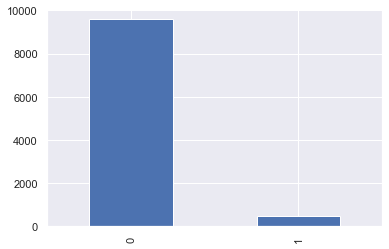

In [745]:
test['bank_account'].value_counts().plot(kind='bar')